# Linear Regression 1 Input

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [110]:
data = pd.read_csv('data/1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [111]:
# GPA - dependent variable/output/target
# SAT - independent variable/input/feature
y = data['GPA']
x = data['SAT']

In [112]:
x.shape,y.shape

((84,), (84,))

In [113]:
x_mat = x.values.reshape(84,1)
# Or x.values.reshape(-1,1)

In [114]:
reg = LinearRegression()
reg.fit(x_mat,y) # Input first, output after - Opposite of statsmodels


LinearRegression()

##### R-squared
reg.score()

In [115]:
reg.score(x_mat,y)

0.40600391479679765

##### Coefficients
reg.coef_

In [116]:
reg.coef_

array([0.00165569])

##### Intercept
reg.intercept_

In [117]:
reg.intercept_

0.27504029966028076

##### Predictions

In [118]:
reg.predict([[1750],[1850],[1920]])

array([3.17249439, 3.33806319, 3.45396136])

In [119]:
new_data = pd.DataFrame(data=[1740,1850],columns=['SAT'])
new_data

,SAT
0,1740
1,1850


In [120]:
reg.predict(new_data)

c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.33806319])

In [121]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted_GPA
0,1740,3.155938
1,1850,3.338063


##### Plotting

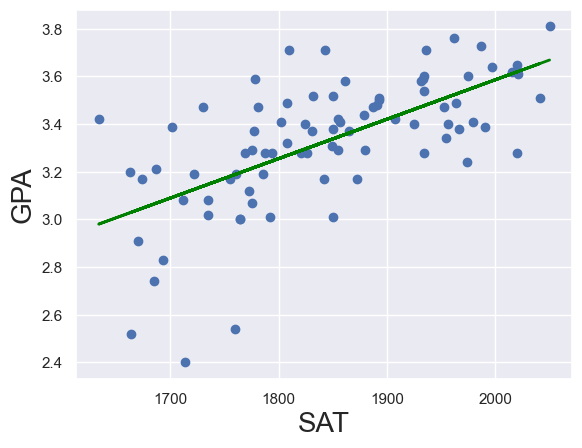

In [122]:
plt.scatter(x,y)
yhat = reg.coef_ * x_mat + reg.intercept_
fig = plt.plot(x, yhat, lw=2, c='green', label = 'reg-line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Multiple Inputs Linear Regression

In [123]:
data = pd.read_csv('data/1.02. Multiple linear regression.csv')
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [124]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [125]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [126]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [127]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [128]:
reg.intercept_

0.29603261264909486

##### Adjusted R-squared

In [129]:
# Non-adjusted R-squared
reg.score(x,y)

0.4066811952814282

* Adjusted formula

$R^2(adj.) = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [130]:
x.shape

(84, 2)

* n = number of observations = 84
* p = number of predictors(inputs) = 2

In [131]:
1-(1-reg.score(x,y))*((84-1)/(84-2-1))

0.39203134825134

* If R^2(adj.) < R^2 we have inputs in our model that don't increase our regression's accuracy

##### Feature Selection

In [132]:
from sklearn.feature_selection import f_regression

In [134]:
f_reg = f_regression(x,y)
f_values = f_reg[0]
p_values = f_reg[1]

In [135]:
f_values

array([56.04804786,  0.17558437])

In [136]:
p_values

array([7.19951844e-11, 6.76291372e-01])

* SAT has 56.05 F-stat and p << 0.001 -> Statistically significant
* Rand 1,2,3 has 0.17 F-stat and p = 0.676... -> Statistically insignificant -> **Should be removed from the model**

* Makes sense since Rand 1,2,3 is just a random whole number between 1-3

* **These values don't take into account the interrelation of inputs/features** It's fine in this example though!

##### Summary table

In [138]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [139]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

In [140]:
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


# Standardization

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()

In [143]:
# Calculates mean and std
scaler.fit(x)

StandardScaler()

In [148]:
x_scaled = scaler.transform(x)
x_scaled[:5,:]

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087]])

### Regression with scaled input

In [150]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [151]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [153]:
reg.intercept_

3.330238095238095

In [157]:
reg_summary = pd.DataFrame([['Intercept'],['SAT'], ['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1] # Weights = Coefficients

In [158]:
reg_summary

,Features,Weights
0,Intercept,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


Test push after renaming github remote repo